In [15]:
from eda_imports import *
from adjustText import adjust_text

In [16]:
df0 = pd.read_csv('../benchmark_transcriptome/after-chimeric-with-ref-hex/bm_output.after-chimeric-with-ref-hex-dist.csv')
df0['program'] = 'karbor-after-chimeric-ref-hex-dist'

In [18]:
df1 = pd.read_csv('../benchmark_transcriptome/benchmark.csv')
df1['program'] = 'karbor-tcga-run-3'

In [4]:
# df2 = pd.read_csv('../benchmark_transcriptome/with-no-ctg-clv/bm-ctg-hex-dist.csv')
# df2['program'] = 'karbor-ctg-hex-dist-with-no-ctg-clv'

In [19]:
# df1 = pd.read_csv('../2018-07-18-version/current-ref-hex-dist.csv')
# df1['program'] = 'karbor-ref-hex-dist'

# df2 = pd.read_csv('../benchmark_transcriptome/tcga-run-2-version/current-ctg-hex-dist.csv')
# df2['program'] = 'karbor-ctg-hex-dist-tcga-run-2'


# df3 = pd.read_csv('../2018-07-18-version/current-n-ref-hex-dist.csv')
# df3['program'] = 'karbor-n-ref-hex-dist'

# df4 = pd.read_csv('../2018-07-18-version/current-n-ctg-hex-dist.csv')
# df4['program'] = 'karbor-n-ctg-hex-dist'

In [20]:
df_cat = pd.concat([df0, df1])
# df_cat = pd.concat([df0, df1, df2])
# df_cat = pd.concat([df0, df1, df2, df3, df4])
df_cat = df_cat.query('tree_max_depth <= 18')

In [21]:
df_cat.head(2)

,sample_id,precision,recall,f1,tree_max_depth,program
0,HBRC4,0.717033,0.071926,0.130738,1,karbor-after-chimeric-ref-hex-dist
1,HBRC4,0.836756,0.066934,0.123952,2,karbor-after-chimeric-ref-hex-dist


In [22]:
df_cat.program.value_counts()

karbor-after-chimeric-ref-hex-dist    72
karbor-tcga-run-3                     72
Name: program, dtype: int64

0,1,2,3,

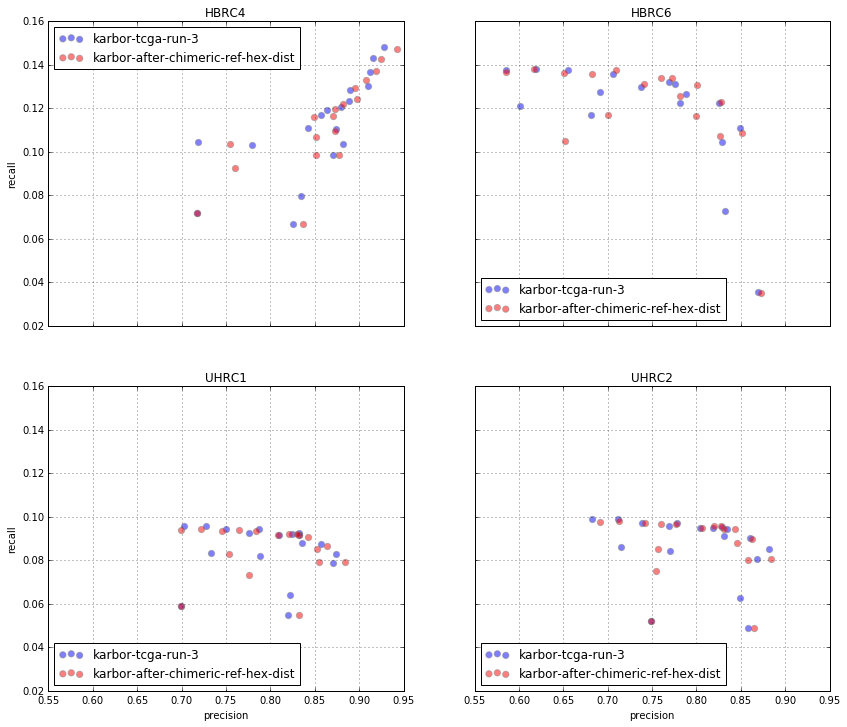

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()


color_dd = dict(zip([
#         'karbor-ref-hex-dist',
#         'karbor-ctg-hex-dist',
    
#     'karbor-ctg-hex-dist-with-ctg-clv',
#     'karbor-ctg-hex-dist-with-no-ctg-clv',

#         'karbor-ctg-hex-dist-tcga-run-2',
    
    'karbor-tcga-run-3',
        'karbor-after-chimeric-ref-hex-dist'
    ], ['blue', 'red', 'yellow', 'orange', 'black']))

for k, sid in enumerate(['HBRC4', 'HBRC6', 'UHRC1', 'UHRC2']):
    print(k, end=',')
    ax = axes[k]
    
    for kver in [
#         'karbor-ref-hex-dist',
#         'karbor-ctg-hex-dist',

            
#     'karbor-ctg-hex-dist-with-ctg-clv',
#     'karbor-ctg-hex-dist-with-no-ctg-clv',
        
#         'karbor-ctg-hex-dist-tcga-run-2',
#         'karbor-n-ref-hex-dist',
#         'karbor-n-ctg-hex-dist',
        
        'karbor-tcga-run-3',
        'karbor-after-chimeric-ref-hex-dist'
    ]:
        _df = df_cat.query(f'program == "{kver}"').query(f'sample_id == "{sid}"')
        if _df.shape[0] > 0:
            color = color_dd[kver]
            _df.plot.scatter('precision', 'recall', marker='o', alpha=0.5,
                             s=40, edgecolor='gray', color=color, ax=ax, label=kver)
        
#         txts = []
#         for k, row in _df.iterrows():
#             txt = ax.text(row.precision, row.recall, row.tree_max_depth)
#             txts.append(txt)
    
    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    if k == 0:
        ax.legend(loc='best')
    else:
        ax.legend(loc='lower left')
        
    ax.set_xlim(0.55, 0.95)
    ax.set_ylim(0.02, 0.16)
#     adjust_text(txts)
    
# slow step, not working well with multiple subplots
# adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
#     break
# plt.tight_layout()
# plt.suptitle('ctg hex', y=1.01, fontsize=20)